In [4]:
import pandas as pd

# Load the dataset
file_path =("C:\\Users\\sathe\\OneDrive\\Desktop\\MAJOR PROJECT\\global-data-on-sustainable-energy (1).csv")
data= pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(data.head(3))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fo

In [5]:
data.shape

(3649, 21)

In [6]:
# Check for missing values in all columns
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_

In [7]:
data['Access to electricity (% of population)'] = data['Access to electricity (% of population)'].interpolate(method='linear')
data['Electricity from fossil fuels (TWh)'] = data['Electricity from fossil fuels (TWh)'].interpolate(method='linear')
data['Low-carbon electricity (% electricity)'] = data['Low-carbon electricity (% electricity)'].interpolate(method='linear')


In [8]:
data['gdp_per_capita'] = data['gdp_per_capita'].fillna(data['gdp_per_capita'].median())
data['gdp_growth'] = data['gdp_growth'].fillna(data['gdp_growth'].mean())


In [9]:
# Check for missing values in all columns
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                                0
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                    0
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                 0
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [14]:
# Target: 'Primary energy consumption per capita (kWh/person)'
# Features: 'Access to electricity (% of population)', 'GDP per capita', 'Electricity from fossil fuels (TWh)'
features = ['Access to electricity (% of population)', 'gdp_per_capita', 'Electricity from fossil fuels (TWh)']
target = 'Primary energy consumption per capita (kWh/person)'


In [15]:

# Verify that there are no missing values
print(data[features].isnull().sum())
print(data[target].isnull().sum())


Access to electricity (% of population)    0
gdp_per_capita                             0
Electricity from fossil fuels (TWh)        0
dtype: int64
0


In [35]:
# Initialize MinMaxScaler and scale the features and target together
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[features + [target]])


In [36]:
# Separate the features and target after scaling
X_scaled = data_scaled[:, :-1]  # Features (without target)
y_scaled = data_scaled[:, -1]  # Target (last column)

In [37]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # Input features
        y.append(data[i+seq_length, -1])  # Target column
    return np.array(X), np.array(y)
# Set sequence length (e.g., 5 years for predicting the next year)
seq_length = 5
X, y = create_sequences(data_scaled, seq_length)

In [38]:
# Split the data into training and test sets (80% train, 20% test)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [42]:
# Define the LSTM model
model = Sequential([
    Input(shape=(seq_length, X.shape[2])),  # Use Input to specify input shape
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(1)  # Single output for primary energy consumption
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [43]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0137 - mae: 0.0692 - val_loss: 0.0163 - val_mae: 0.0716
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0101 - mae: 0.0561 - val_loss: 0.0151 - val_mae: 0.0705
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - mae: 0.0512 - val_loss: 0.0160 - val_mae: 0.0683
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0081 - mae: 0.0499 - val_loss: 0.0141 - val_mae: 0.0765
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mae: 0.0513 - val_loss: 0.0148 - val_mae: 0.0693
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mae: 0.0503 - val_loss: 0.0156 - val_mae: 0.0727
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - mae: 0.0521 - val_loss: 0.0143 - val_mae: 0.0714
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0080 - mae: 0.0487 - val_loss: 0.0142 - val_mae: 0.0713
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0085 - mae:

In [44]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [47]:
# Inverse scaling for train predictions
n_features = len(features)  # Get the number of features

# Concatenate the train predictions with zeros for the target columns (excluding the target)
train_predict_rescaled = scaler.inverse_transform(
    np.concatenate((train_predict, np.zeros((train_predict.shape[0], n_features))), axis=1)
)[:, 0]

# Check the result
print(f"Train Predictions (Rescaled): {train_predict_rescaled[:5]}")




Train Predictions (Rescaled): [2.43618116 2.6620351  3.10935658 3.28161164 3.54996785]


In [29]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mae: 0.0709
Test Loss: 0.013315021991729736, Test MAE: 0.06912305951118469


In [32]:
# Separate the features and target after scaling
X_scaled = data_scaled[:, :-1]  # Features
y_scaled = data_scaled[:, -1]  # Target


In [53]:
# Inverse scaling for predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# For train predictions
train_predict_rescaled = scaler.inverse_transform(
    np.column_stack((train_predict, np.zeros((train_predict.shape[0], len(features)))))  # Include only zero columns for features
)[:, 0]

# For actual train values
y_train_actual = scaler.inverse_transform(
    np.column_stack((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], len(features)))))  # Zero columns for features
)[:, 0]

# For test predictions
test_predict_rescaled = scaler.inverse_transform(
    np.column_stack((test_predict, np.zeros((test_predict.shape[0], len(features)))))  # Zero columns for features
)[:, 0]

# For actual test values (y_test_actual)
y_test_actual = scaler.inverse_transform(
    np.column_stack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], len(features)))))  # Zero columns for features
)[:, 0]



92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Calculate MAE and RMSE for train and test predictions
train_mae = mean_absolute_error(y_train_actual, train_predict_rescaled)
test_mae = mean_absolute_error(y_test_actual, test_predict_rescaled)

train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict_rescaled))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict_rescaled))

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")



Train MAE: 5.2445578165521605
Test MAE: 6.86080657477025
Train RMSE: 8.68281736563769
Test RMSE: 11.160735737335527


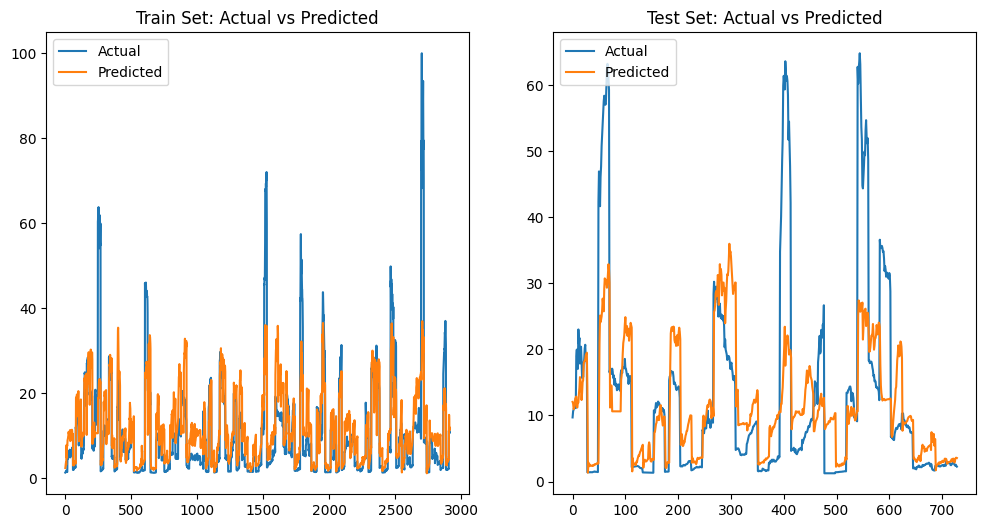

In [56]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values for the training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(y_train_actual, label='Actual')
plt.plot(train_predict_rescaled, label='Predicted')
plt.title('Train Set: Actual vs Predicted')
plt.legend()

# Plot the actual vs predicted values for the test set
plt.subplot(1, 2, 2)
plt.plot(y_test_actual, label='Actual')
plt.plot(test_predict_rescaled, label='Predicted')
plt.title('Test Set: Actual vs Predicted')
plt.legend()

plt.show()
